# Clustering the Images and getting rid of artifacts

## Let's start by importing things we need
1. numpy is an linear algebra library
2. Matplotlib is a plotting library
3. BioImage is a library stored in this folder that handles loading and displaying images from the dataset provided. 
3. Scipy.cluster contains the kmeans clustering algorithm. 
4. random imports a randint which generates random integers. 

**Note about kmeans clustering:** This takes a list of features and clusters them to generate similarly placed data samples.  

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from BioImage import BioImage, folders
from scipy.cluster.vq import vq, kmeans, whiten
from numpy.random import randint

np.random.seed(10)

Let's load up the features in the dataset. The features are produced by fitting a gaussian to CH1 (black/white) and CH6 (side-scatter).

Each row of the dataset is one sample from the data. The columns are as follows

| folder number 	| sample number 	| height_1 	| amplitude_1 	| x_1	| y_1 	| width_x_1 	| width_y_1 	| rota_1 	| height_6 	| amplitude_6 	| x_6 	| y_6 	| width_x_6 	| width_y_6 	| rota_6 	|
|---------------	|---------------	|--------	|-----------	|---	|---	|---------	|---------	|------	|--------	|-----------	|---	|---	|---------	|---------	|------	|


In [30]:
data = np.load('Maxima_dataset.npy')
#data = np.load('Y_2_converted.npy')
idx = randint(0,data.shape[0])
print('Example: \n', data[idx][:])
print(data.shape[0])

Example: 
 [1.00000000e+00 7.67300000e+03 1.00000000e+00 2.00000000e+00
 1.70000000e+01 5.60000000e+01 3.46213203e+01 5.86800417e-01
 1.39000000e+02 7.54497475e+01 3.06682404e-01]
50000


Using the width data, a rudimentary metric of sphericity can be calculated. it's basically min(width_x,width_y)/max(width_x,width_y). This should give you a number between 0 and 1 for the sphericity. 


The Circularity is: 0.0367286627330971


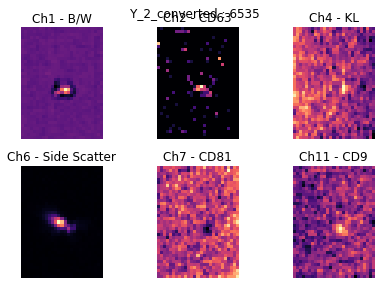

In [22]:
idx = randint(0,data.shape[0])
print("The Circularity is: " + str(circularity1[idx]))

b = BioImage(folders[int(data[idx,0])], int(data[idx,1]))

b.showImage()

Let's create a new dataset to select the features we care about from the previous dataset for clustering. 

In [23]:
#width1 = np.amin(width1,axis=1)
#width2 = np.amin(width2,axis=1)


print(width1.shape)

(15542, 2)


In [24]:
circularity1 = np.expand_dims(circularity1, axis=1)
circularity2 = np.expand_dims(circularity2, axis=1)
amplitude2 = np.expand_dims(amplitude2, axis=1)
amplitude1 = np.expand_dims(amplitude1, axis=1)
#width1 = np.expand_dims(width1, axis=1)
#width2 = np.expand_dims(width2, axis=1)
width1 = np.sort(width1,axis=1)
width2 = np.sort(width2,axis=1)

clustering_dataset = np.concatenate((width1, width2,amplitude1, amplitude2), axis=1)

# filtered = whiten(data[:,[6,7,13,14]])
filtered = whiten(clustering_dataset)
# filtered = data[:,2:]

Run the clustering algorithm. We choose a large number of clusters. IF the algorithm can't find as many, it'll return however many it can find. 

In [25]:
num_clusters = 2
centroids,_ = kmeans(filtered, num_clusters)
print(centroids.shape)

idx,_ = vq(filtered, centroids)

for i in range(0, num_clusters):
    print (data[idx==i, :].shape)


(2, 6)
(658, 21)
(14884, 21)


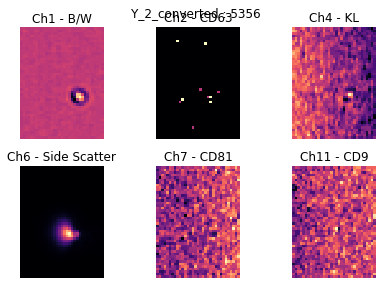

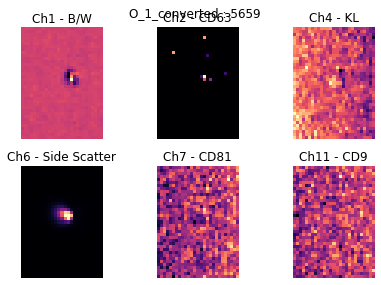

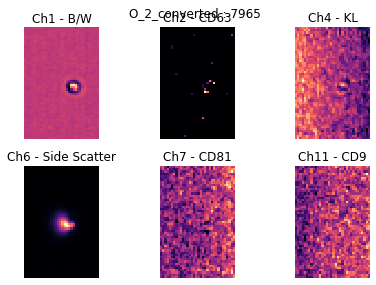

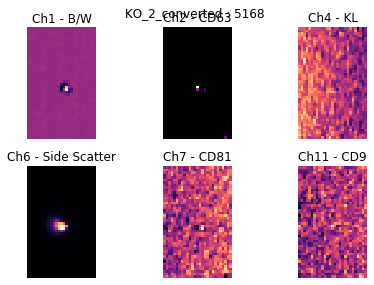

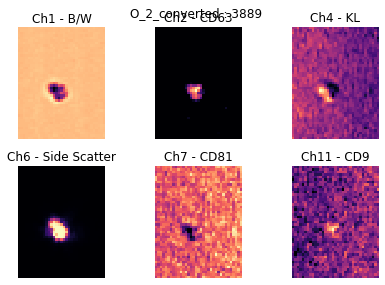

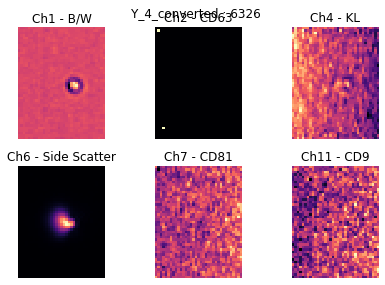

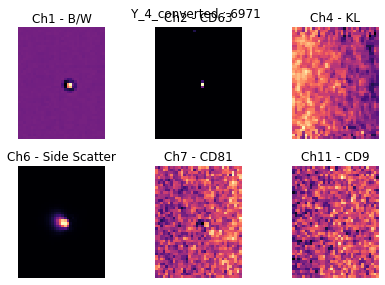

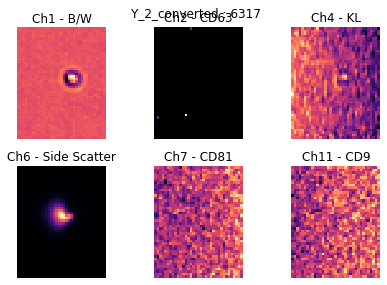

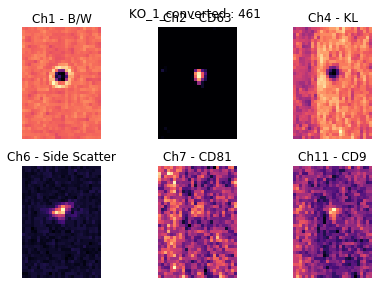

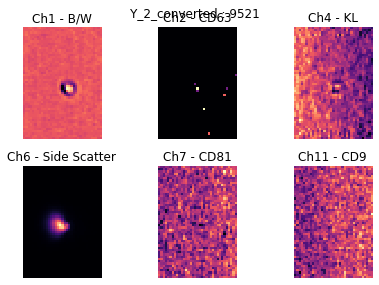

In [27]:
counts = np.bincount(idx)
cluster_number = np.argmax(counts)
#cluster_number = 4
largest_cluster = data[idx==cluster_number,:]
np.random.shuffle(largest_cluster)
for folder, cluster in zip(largest_cluster[0:10,0], largest_cluster[0:10,1]):
    b = BioImage(folders[int(folder)], int(cluster))
    b.showImage()
    plt.close()

3


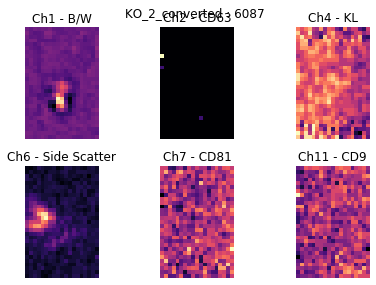

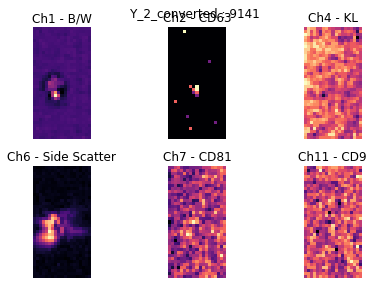

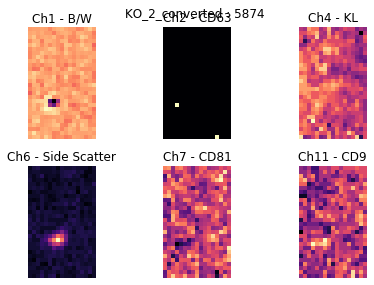

In [9]:
test = clustering_dataset

idx = np.logical_and(np.logical_and(
        test[:,0] > 0.5,
        test[:,1] > 0.5),np.logical_and(test[:,3]<6,test[:,5]<6) )       
        
testc = data[idx==True,:]
print(testc.shape[0])

np.random.shuffle(testc)
for folder, cluster in zip(testc[0:10,0], testc[0:10,1]):
    b = BioImage(folders[int(folder)], int(cluster))
    b.showImage()
    plt.close()